In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [107]:
%run Data_cleaning.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 459.2+ MB


In [108]:
avg_temperature_pivot = pd.pivot_table(df_budapest, values="AverageTemperature", index = "Year",fill_value=0)
x = avg_temperature_pivot.index
y = avg_temperature_pivot["AverageTemperature"]

In [109]:
avg_temperature_pivot = avg_temperature_pivot.drop_duplicates()

In [110]:
def visualization_function(x_label, y_label , title, legendlist, legendloc, xticksrotation) -> plt.figure: 
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title , fontsize=12)
    plt.legend(legendlist, loc = legendloc)
    plt.xticks(rotation = xticksrotation, ha = "right")
    plt.grid(True)
    
    plt.show()

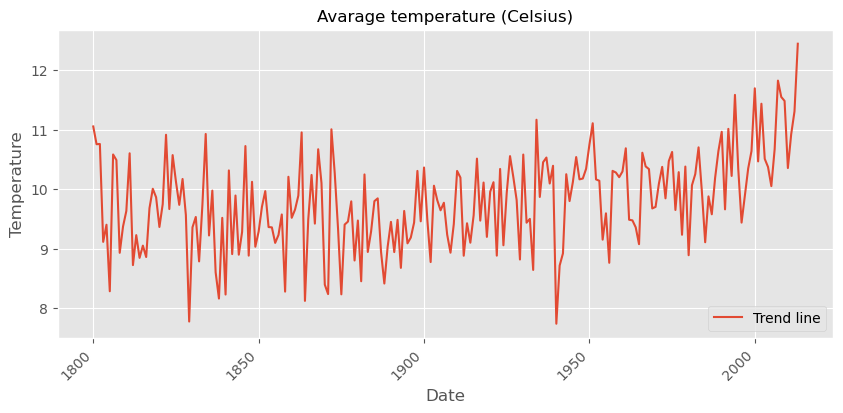

In [113]:
plt.figure(figsize= (10,4))
plt.plot(x,y)
visualization_function("Date","Temperature","Avarage temperature (Celsius)", ["Trend line"], "lower right", 45)
